# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [1]:
#What test is appropriate for this problem? Does CLT apply?
#What are the null and alternate hypotheses?

I would use a Z-test and the CLT does apply.

My null hypothesis would that racism does not exit and that whites and blacks have statiscally similar response rates.

My alternate hypothesis would be that racism does exist.

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [5]:
w = data[data.race=='w']
b = data[data.race=='b']

0.03203285485506058
The expected call rate for all applicants is:  0.0805
While the expected call rate for white applicants is:  0.0965
While the expected call rate for black applicants is:  0.0645
The margin of error is : 0.0055
The 95% CI for all applicants is 0.075 , 0.086
p is:  0.09774127310061602


Text(0.5,1,'Black call back')

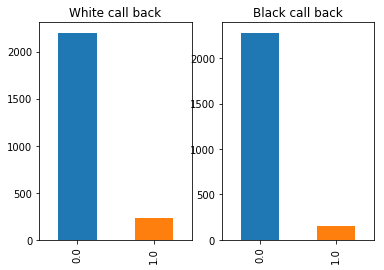

In [69]:
# Your solution to Q3 here
#3. Compute margin of error, confidence interval, and p-value. 
#   Try using both the bootstrapping and the frequentist statistical approaches.

w_callback = np.mean(w['call'])
b_callback = np.mean(b['call'])
callback_diff = w_callback - b_callback
callback_mean = np.mean(data.call)

call_diff = np.empty(len(w))
for i in range(len(w)):
    call_diff[i] = w.call.iloc[i] - b.call.iloc[i]

w_call_var = np.var(w['call'])
b_call_var = np.var(b['call'])
call_var = np.var(data.call)
call_vars = (w_call_var + b_call_var)
call_varss = (callback_mean*(1-callback_mean))

margin_of_error = (1.96 *call_var/len(data)) ** .5

p = (np.sum(call_diff > 0) + np.sum(call_diff < 0)) / (len(data)/2)

print(callback_diff)

print('The expected call rate for all applicants is: ',round(callback_mean,4))
print('While the expected call rate for white applicants is: ',round(w_callback,4))
print('While the expected call rate for black applicants is: ',round(b_callback,4))
print('The margin of error is :', round(margin_of_error,4))
print('The 95% CI for all applicants is',round(callback_mean-margin_of_error,4),',',round(callback_mean + margin_of_error,4))
print('p is: ',p)

#print('The z-score is ',(0-callback_diff)/(call_var/len(data))**.5)
#Cannot tell distribution, I suspect it is bimodal

plt.subplot(1,2,1)
w_bar = w['call'].value_counts().plot(kind='bar')
plt.title('White call back')

plt.subplot(1,2,2)
b_bar = b['call'].value_counts().plot(kind='bar')
plt.title('Black call back')


C:\Users\leero\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


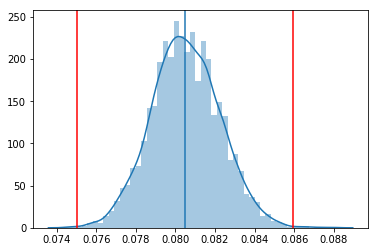

In [111]:
n = 24350
callback_w_sample = np.random.binomial(n,w_callback,size=10000)/n
callback_b_sample = np.random.binomial(n,b_callback,size=10000)/n
callback_sample_n = np.random.binomial(n,callback_mean,size=10000)/n
callback_sample = np.concatenate((callback_b_sample,callback_w_sample))

callback_sample_mean=np.mean(callback_sample)

_ = sns.distplot(callback_sample_n)
_ = plt.axvline(callback_sample_mean)
_ = plt.axvline(callback_mean+margin_of_error,color='r')
_ = plt.axvline(callback_mean-margin_of_error,color='r')

w_sample_callback = np.mean(callback_w_sample)
b_sample_callback = np.mean(callback_b_sample)


C:\Users\leero\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\leero\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\leero\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


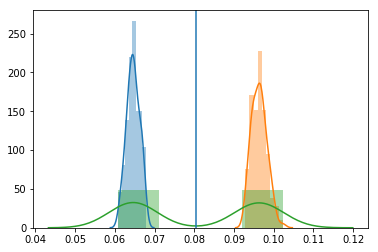

In [80]:
_ = sns.distplot(callback_b_sample)
_ = sns.distplot(callback_w_sample)
_ = sns.distplot(callback_sample)
_ = plt.axvline(callback_sample_mean)

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

In [65]:
w_education = np.mean(w.education)
b_education = np.mean(b.education)

print('Average education for whites: ', round(w_education,2))
print('Average education for blacks: ', round(b_education,2))

w_yearsexp = np.mean(w.yearsexp)
b_yearsexp = np.mean(b.yearsexp)

print('Average work experience for whites: ', round(w_yearsexp,2),' years')
print('Average work experience for blacks: ', round(b_yearsexp,2),' years')

w_female = w.loc[w['sex'] == 'f']
w_male = w.loc[w['sex'] == 'm']

b_female = b.loc[b['sex'] == 'f']
b_male = b.loc[b['sex'] == 'm']

print(np.mean(w_female.call))
print(np.mean(w_male.call))

print(np.mean(b_female.call))
print(np.mean(b_male.call))

f=data.loc[data.sex=='f']
m=data.loc[data.sex=='m']

f_callback = np.mean(f['call'])
m_callback = np.mean(m['call'])
callback_diff = f_callback - m_callback
callback_mean = np.mean(data.call)

print(len(m),len(f))


Average education for whites:  3.62
Average education for blacks:  3.62
Average work experience for whites:  7.86  years
Average work experience for blacks:  7.83  years
0.09892473369836807
0.08869565278291702
0.06627783924341202
0.05828779563307762
1124 3746


# Conculsion
The data came from https://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states where researchers aim to find out if there is racial discrimination in the United States labor market. They sent out 5,000 résumés to 1,300 jobs in the Boston and Chicago area. Each application seems to have similar experiences but, different names. The different names implied an applicants’ race. 
Right off the bat we do see that “white” applicants are asked to come in for interviews more often than “black” applicants.
The expected call rate for all applicants is:  0.0805
While the expected call rate for white applicants is:  0.0965
While the expected call rate for black applicants is:  0.0645

Meanwhile the average black applicant is beyond the lower bound of our 95% confidence interval.
The margin of error is: 0.0055
The 95% CI for all applicants is 0.075, 0.086

We also performed a hypothesis test. Our null was that racism did not exist where our difference in callback rate was on average 0, and our alternative hypothesis was that racism did exist and difference in callback is not 0. We got a p-value of 0.097741. While this is above the standard p value that denotes statistical significance, we believe that some racial discrimination exists. The average education level and work experience was the same for both applicants. Females are asked to come in for interviews in greater percentages. 
